<a href="https://colab.research.google.com/github/VanessaRivas2000/Tareas-Progra-III/blob/main/ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import zipfile
import io
import tensorflow as tf
import math
import tensorflow_datasets as tfds
import cv2
import numpy as np
import os 
import matplotlib.pyplot as plt


In [44]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]

In [ ]:
for img in datos_entrenamiento.take(1):
  print(img)
  img = img[0].numpy().reshape(1,28,28,1)
  plt.grid(False)
  plt.imshow(img[0, ..., 0], cmap=plt.cm.binary)

In [46]:
numeros_letras = ["Camistea", "Pantalon", "abrigo", "Vestido", "Sueter", "Sandalias", "Camisa", "Zapatos Deportivos", "Bolso", "Botas"]

In [47]:
cantidad_numeros_entrenamiento = metadata.splits["train"].num_examples
cantidad_numeros_prueba = metadata.splits["test"].num_examples
print("Entrenamiento", cantidad_numeros_entrenamiento, "Pruebas", cantidad_numeros_prueba)

Entrenamiento 60000 Pruebas 10000


In [48]:
def normalizacion(img, label):
  img = tf.cast(img, tf.float32)
  img /= 255 
  return img, label

In [49]:
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [50]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [51]:
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [52]:
size_lote = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(cantidad_numeros_entrenamiento).batch(size_lote)
datos_prueba= datos_prueba.repeat().shuffle(cantidad_numeros_prueba).batch(size_lote)

In [53]:
modelo.fit(datos_entrenamiento, epochs=10,
           steps_per_epoch=math.ceil(cantidad_numeros_entrenamiento/size_lote))

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.5010 - accuracy: 0.8224
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3787 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3340 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3147 - accuracy: 0.8833
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2958 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2861 - accuracy: 0.8925
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2723 - accuracy: 0.8966
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2661 - accuracy: 0.9009
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2577 - accuracy: 0.9027
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.25

In [54]:
def graficar_imagen(i, predictions_array,true_labels,images):
  predictions_array, true_labels, img = predictions_array[i],true_labels[i],images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0],cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  print(predicted_label)
  if predicted_label == true_labels:
   color = 'blue'
  #else:
   plt.xlabel("Prediccion: {}".format(numeros_letras[predicted_label]), color=color)

In [79]:
!unzip imagenes.zip

Archive:  imagenes.zip
replace imagenes/leer_imagenes/Bolso2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: imagenes/leer_imagenes/Bolso2.jpg  
replace imagenes/leer_imagenes/botin.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: imagenes/leer_imagenes/botin.jpg  
replace imagenes/leer_imagenes/camisa.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: imagenes/leer_imagenes/camisa.jpg  
replace imagenes/leer_imagenes/camiseta.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: imagenes/leer_imagenes/camiseta.jpg  
replace imagenes/leer_imagenes/pantalon.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: imagenes/leer_imagenes/pantalon.png  
replace imagenes/leer_imagenes/pull-over.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: imagenes/leer_imagenes/pull-over.jpg  
replace imagenes/leer_imagenes/saco.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: imagenes/leer_imagenes/saco.jpg  
replace imagenes/leer_imagenes/sandalia1.jpg?

In [65]:
!unzip Ropa.zip

Archive:  Ropa.zip
replace Ropa/Camisa.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Ropa/Camisa.png         
replace Ropa/Lentes.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Ropa/Lentes.png         
replace Ropa/Mochila.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Ropa/Mochila.png        
replace Ropa/Pantalon.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Ropa/Pantalon.png       
replace Ropa/Sandalia.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Ropa/Sandalia.png       
replace Ropa/Sudadera.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Ropa/Sudadera.png       
replace Ropa/Sueter.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Ropa/Sueter.png         
replace Ropa/Tacon.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Ropa/Tacon.png          
replace Ropa/Vestido.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Ropa/Vestido.png        
replace Ropa/Zapatilla.png? [y]es, [n]o, [A]ll,

In [80]:
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

In [81]:
def graficar_valores_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i],true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#888888")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [95]:
numrows=5
numcols=3
numimages = numrows*numcols

0
7
2
3
7
0
9
8
2
0
5
6
7
8
4


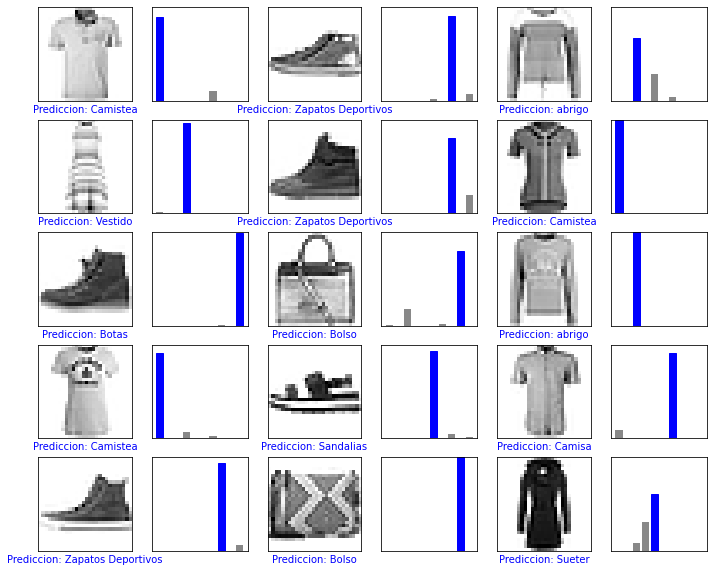

In [96]:
plt.figure(figsize=(2*2*numcols,2*numrows))
for i in range(numimages):
  plt.subplot(numrows,  2*numcols,  2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(numrows, 2*numcols,2*i+2)
  graficar_valores_array(i,predicciones,etiquetas_prueba)


plt.show()

In [70]:
import cv2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


<function matplotlib.pyplot.show(*args, **kw)>

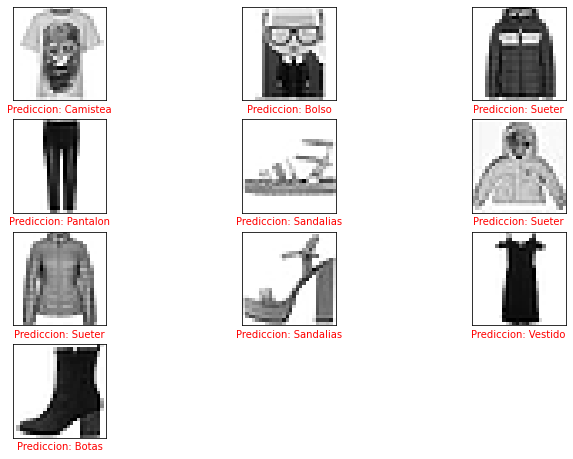

In [100]:
datos = ["/content/Ropa/Camisa.png", "/content/Ropa/Lentes.png", "/content/Ropa/Mochila.png", "/content/Ropa/Pantalon.png", "/content/Ropa/Sandalia.png", "/content/Ropa/Sudadera.png", "/content/Ropa/Sueter.png", "/content/Ropa/Tacon.png", "/content/Ropa/Vestido.png", "/content/Ropa/Zapatilla.png"]
plt.figure(figsize=(2*2*numcols, 2*numrows))
for indice in range(10):

  plt.subplot(numrows, 2*numcols,  2*indice+1)
  imagenn=cv2.imread(datos[indice],cv2.IMREAD_GRAYSCALE)
  plt.subplot(numrows, 2*numcols,2*indice+1)
  plt.xticks([])
  plt.yticks([])
  imagenn=cv2.resize(imagenn,(28,28))
  img_predic=modelo.predict(imagenn.reshape(1,28,28,1))

  valor_prediccion=np.argmax(img_predic)
  plt.imshow(imagenn,cmap=plt.cm.binary)
  plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]),color="red")

plt.show
